1. Выберите наборы данных. которые можно интерпретировать, как временные ряды:

    а) зависимость цены на недвижимость в конкретном регионе от времени,

    б) скорость полета самолета при перелете из аэропорта А в аэропорт В,

    в) количество отказов компьютера,

    г) число обращений в поликлинику по району,

    д) координаты автобуса при движении по маршруту,

    е) координаты фигуры нарушителя в файле видеофиксации охранной системы.


Ответ: все эти наборвы можно итерпретировать как в ременные ряды, если в них присутствует метка времени.

2. Прочитайте DUQ_hourly.csv и проверьте качество и порядок разметки этой выборки с информацией о потреблении энергии в одном из районов Восточной Электросети США. Сделайте описание особенностей этой выборки.

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# читаем файл
file = '~/Yandex.Disk/geekbrains/Python/MLInBusines/DUQ_hourly.csv'
DUQ_df = pd.read_csv(file, index_col=[0], encoding='utf-8')
DUQ_df.head()

,DUQ_MW
Datetime,
2005-12-31 01:00:00,1458.0
2005-12-31 02:00:00,1377.0
2005-12-31 03:00:00,1351.0
2005-12-31 04:00:00,1336.0
2005-12-31 05:00:00,1356.0


In [3]:
# Смотрим что мы имеем
DUQ_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119068 entries, 2005-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   DUQ_MW  119068 non-null  float64
dtypes: float64(1)
memory usage: 1.8+ MB


Файл содержит 119068 записей за период с 31 дек. 2005 г. по 2 янв. 2018 г.

Пропусков в данных нет.

In [4]:
# Посмотрим на наши данные более детально
DUQ_df.describe()

,DUQ_MW
count,119068.000000
mean,1658.820296
std,301.740640
min,1014.000000
25%,1444.000000
50%,1630.000000
75%,1819.000000
max,3054.000000


(array([ 4722., 21803., 32371., 31597., 16427.,  6131.,  3472.,  1748.,
          679.,   118.]),
 array([1014., 1218., 1422., 1626., 1830., 2034., 2238., 2442., 2646.,
        2850., 3054.]),
 <a list of 10 Patch objects>)

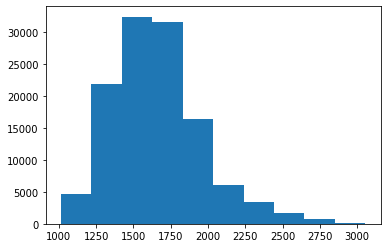

In [5]:
plt.hist(DUQ_df['DUQ_MW'])
# DUQ_df.hist()

Тут мы можем заключить, что серьезных выбросов в данных нет.

In [6]:
# Для удобства и меньшего объема приобразуем типы наших данных
DUQ_df.index = pd.to_datetime(DUQ_df.index)
DUQ_df['DUQ_MW'] = DUQ_df['DUQ_MW'].astype(int)

Text(0, 0.5, 'МВт')

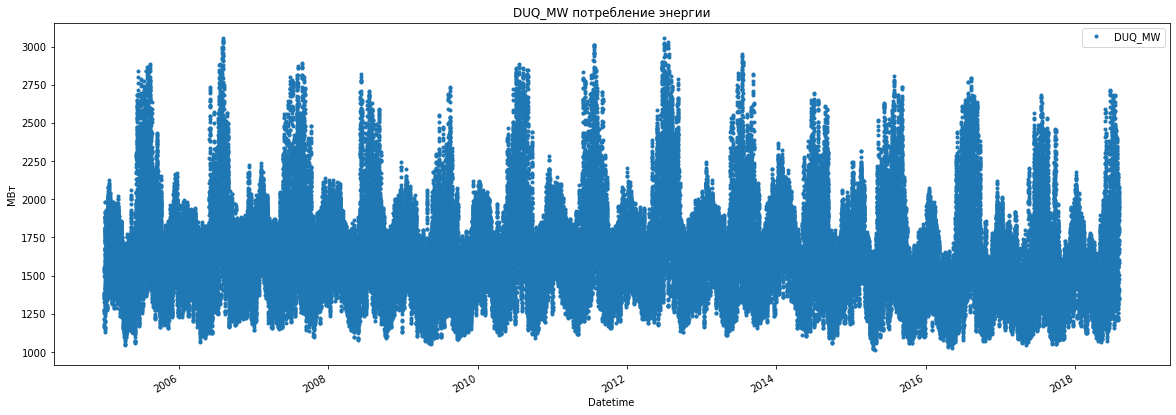

In [7]:
# Построим график наших данных
DUQ_df.plot( style = '.', figsize = ( 20, 7 ), title = 'DUQ_MW потребление энергии' )
plt.ylabel ( 'МВт' )

Глядя на график, можно заключить, что наши данные меняются циклично, кроме того можно также выделить сезонность, летом потребление энергии возрастает.

Серьезных выбросов не наблюдается.

Text(0, 0.5, 'МВт')

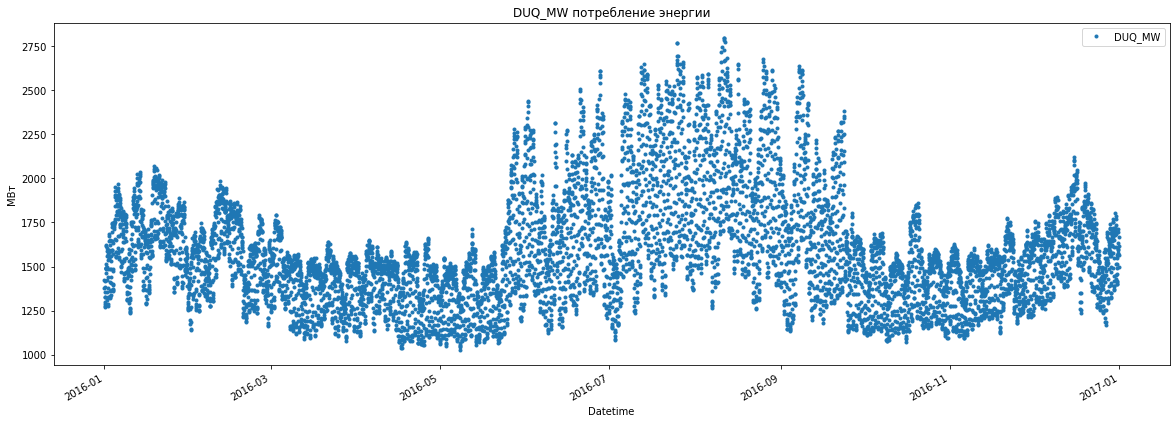

In [8]:
# Проверим нашу гипотезу относительно сезонности.
DUQ_df['2016-01-01 00:00:00':'2016-12-31 23:00:00'].plot( style = '.', figsize = ( 20, 7 ), title = 'DUQ_MW потребление энергии' )
plt.ylabel ( 'МВт' )

Действительно в период с июня по октябрь, потребление энергии возрастает.

In [9]:
DUQ_df['date'] = DUQ_df.index
DUQ_df.head()

,DUQ_MW,date
Datetime,,
2005-12-31 01:00:00,1458,2005-12-31 01:00:00
2005-12-31 02:00:00,1377,2005-12-31 02:00:00
2005-12-31 03:00:00,1351,2005-12-31 03:00:00
2005-12-31 04:00:00,1336,2005-12-31 04:00:00
2005-12-31 05:00:00,1356,2005-12-31 05:00:00


In [10]:
ut = DUQ_df['date'].unique()
print('число уникальных значений:   ',ut.shape[0],' : число наблюдений : ', DUQ_df.shape[0])

число уникальных значений:    119064  : число наблюдений :  119068


In [11]:
# Проверим встречаются ли повторы в данных
DUQ_df['date'].value_counts()

2017-11-05 02:00:00    2
2014-11-02 02:00:00    2
2015-11-01 02:00:00    2
2016-11-06 02:00:00    2
2007-07-15 10:00:00    1
                      ..
2007-04-01 02:00:00    1
2011-10-25 02:00:00    1
2016-05-19 02:00:00    1
2005-10-17 21:00:00    1
2013-06-07 22:00:00    1
Name: date, Length: 119064, dtype: int64

Действительно в 2014-2017 гг. в ноябре наблюдаются дублирующие записи. Предположительно это может быть переход на зимнее время.

Проверим нашу гипотезу, поищем пропуски в данных в марте, если наша гипотеза верна, то там должен быть пропуск, при переходе на летнее время

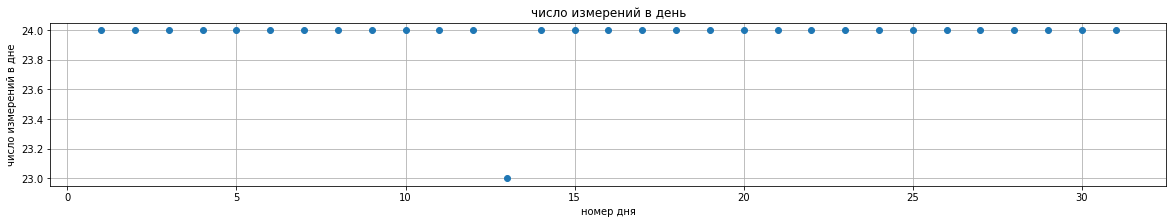

In [12]:
day_H=DUQ_df['2016-03-01 00:00:00':'2016-03-31 23:00:00'].index.day

plt.figure(figsize=(20,3))
plt.plot(day_H.value_counts().index, day_H.value_counts().values ,'o')

plt.xlabel('номер дня')
plt.ylabel('число измерений в дне')
plt.title('число измерений в день')
plt.grid()
plt.show()

Действительно в марте в один из дней количество наблюдений меньше чем в остальные дни.

In [13]:
# Посмотрим на него более детально
DUQ_df['2015-03-13 00:00:00':'2016-03-13 06:00:00'].index

DatetimeIndex(['2015-12-31 01:00:00', '2015-12-31 02:00:00',
               '2015-12-31 03:00:00', '2015-12-31 04:00:00',
               '2015-12-31 05:00:00', '2015-12-31 06:00:00',
               '2015-12-31 07:00:00', '2015-12-31 08:00:00',
               '2015-12-31 09:00:00', '2015-12-31 10:00:00',
               ...
               '2016-01-01 15:00:00', '2016-01-01 16:00:00',
               '2016-01-01 17:00:00', '2016-01-01 18:00:00',
               '2016-01-01 19:00:00', '2016-01-01 20:00:00',
               '2016-01-01 21:00:00', '2016-01-01 22:00:00',
               '2016-01-01 23:00:00', '2016-01-02 00:00:00'],
              dtype='datetime64[ns]', name='Datetime', length=8791, freq=None)

Мы видим, что пропущенны данные в 3 часа ночи.

In [14]:
day_H=DUQ_df['2014-03-01 00:00:00':'2014-03-31 23:00:00'].index.day

Day_count = day_H.value_counts() 
d2014 = Day_count[Day_count != 24]
d2014

9    23
Name: Datetime, dtype: int64

In [15]:
day_H=DUQ_df['2015-03-01 00:00:00':'2015-03-31 23:00:00'].index.day

Day_count = day_H.value_counts() 
d2015 = day_H.value_counts() 
d2015[Day_count != 24]

8    23
Name: Datetime, dtype: int64

In [16]:
day_H=DUQ_df['2016-03-01 00:00:00':'2016-03-31 23:00:00'].index.day

Day_count = day_H.value_counts() 
d2016 = day_H.value_counts() 
d2016[Day_count != 24]

13    23
Name: Datetime, dtype: int64

In [17]:
day_H=DUQ_df['2017-03-01 00:00:00':'2017-03-31 23:00:00'].index.day

Day_count = day_H.value_counts() 
d2017 = day_H.value_counts() 
d2017[Day_count != 24]

12    23
Name: Datetime, dtype: int64

In [18]:
# заполним пропуски в данных, средним между соседними значениеями пропуска 
v1 = list((DUQ_df['2014-03-09 02:00:00']['DUQ_MW'].values + DUQ_df['2014-03-09 04:00:00']['DUQ_MW'].values) / 2)
print(v1)
v2 = list((DUQ_df['2015-03-08 02:00:00']['DUQ_MW'].values + DUQ_df['2015-03-08 04:00:00']['DUQ_MW'].values) / 2)
v3 = list((DUQ_df['2016-03-13 02:00:00']['DUQ_MW'].values + DUQ_df['2016-03-13 04:00:00']['DUQ_MW'].values) / 2)
v4 = list((DUQ_df['2017-03-12 02:00:00']['DUQ_MW'].values + DUQ_df['2017-03-12 04:00:00']['DUQ_MW'].values) / 2)
v =np.reshape([v1[0],v2[0],v3[0],v4[0]],(4,1))

df_data = pd.DataFrame(index = pd.to_datetime(pd.Series(['2014-03-09 03:00:00',
                                                         '2015-03-08 03:00:00',
                                                         '2016-03-13 03:00:00',
                                                         '2017-03-12 03:00:00'])), columns =['DUQ_MW'] , data = v) 
df_data['date'] = df_data.index

DUQ_df = DUQ_df.append(df_data,sort = False)
DUQ_df.tail()

[1415.0]


,DUQ_MW,date
2018-01-02 00:00:00,1721.0,2018-01-02 00:00:00
2014-03-09 03:00:00,1415.0,2014-03-09 03:00:00
2015-03-08 03:00:00,1394.5,2015-03-08 03:00:00
2016-03-13 03:00:00,1111.5,2016-03-13 03:00:00
2017-03-12 03:00:00,1454.0,2017-03-12 03:00:00


In [19]:
# Удаляем дублирующиеся метки

In [22]:
# Вычислим среднее значение дублирующися меток
count_data = DUQ_df['date'].value_counts()
df = DUQ_df.loc[count_data.iloc[:4].index]
df_ = df.groupby('date').mean()
df_['date'] = df_.index

In [23]:
DUQ_df.shape

(119072, 2)

In [25]:
DUQ_df.drop_duplicates(subset = 'date', keep=False, inplace = True)
DUQ_df.shape

(119064, 2)

In [26]:
DUQ_df = DUQ_df.append(df_,sort = False)
DUQ_df.tail()

,DUQ_MW,date
2017-03-12 03:00:00,1454.0,2017-03-12 03:00:00
2014-11-02 02:00:00,1256.0,2014-11-02 02:00:00
2015-11-01 02:00:00,1125.5,2015-11-01 02:00:00
2016-11-06 02:00:00,1114.0,2016-11-06 02:00:00
2017-11-05 02:00:00,1118.0,2017-11-05 02:00:00


Теперь выведем наши данные за месяц

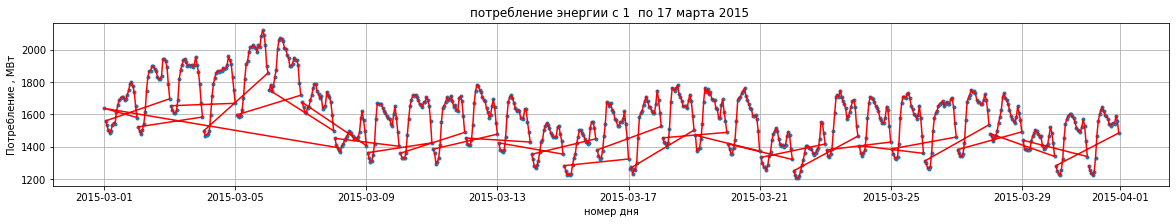

In [27]:
plt.figure(figsize=(20,3))
plt.plot(DUQ_df['2015-03-01 00:00:00':'2015-03-31 23:00:00'].index,DUQ_df['2015-03-01 00:00:00':'2015-03-31 23:00:00']['DUQ_MW'].values, '.')
plt.plot(DUQ_df['2015-03-01 00:00:00':'2015-03-31 23:00:00'].index,DUQ_df['2015-03-01 00:00:00':'2015-03-31 23:00:00']['DUQ_MW'].values, 'r')

plt.xlabel('номер дня')
plt.ylabel('Потребление , МВт')
plt.title('потребление энергии с 1  по 17 марта 2015 ')
plt.grid()

plt.show()

График получился с какимито непонятными линиями, это произошло скорее всего из-за того, что данные заносились не последовательно. Проверим нашу гипотезу.

In [42]:
DUQ_df.iloc[22:26]

,DUQ_MW,date
2005-12-31 23:00:00,1592.0,2005-12-31 23:00:00
2006-01-01 00:00:00,1493.0,2006-01-01 00:00:00
2005-12-30 01:00:00,1484.0,2005-12-30 01:00:00
2005-12-30 02:00:00,1419.0,2005-12-30 02:00:00


Мы видим, что данные за 2006-01-01 00:00:00 находятся между 2005-12-31 23:00:00 и 2005-12-30 01:00:00 что не корректно, исправим это.

In [44]:
DUQ_df = DUQ_df.sort_index()

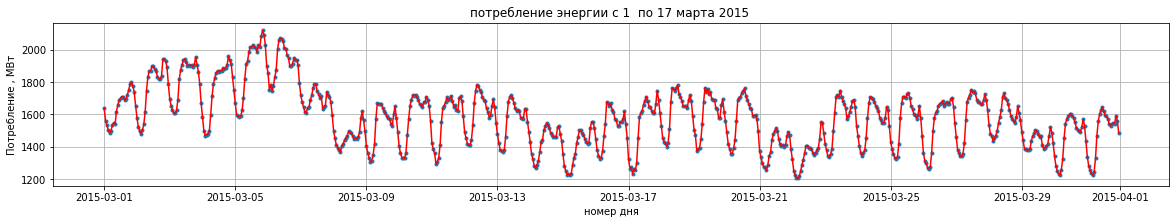

In [45]:
plt.figure(figsize=(20,3))
plt.plot(DUQ_df['2015-03-01 00:00:00':'2015-03-31 23:00:00'].index,DUQ_df['2015-03-01 00:00:00':'2015-03-31 23:00:00']['DUQ_MW'].values, '.')
plt.plot(DUQ_df['2015-03-01 00:00:00':'2015-03-31 23:00:00'].index,DUQ_df['2015-03-01 00:00:00':'2015-03-31 23:00:00']['DUQ_MW'].values, 'r')

plt.xlabel('номер дня')
plt.ylabel('Потребление , МВт')
plt.title('потребление энергии с 1  по 17 марта 2015 ')
plt.grid()

plt.show()

Теперь график выглядит нормально. Данные приведены в порядок и с ними можно работать.

3. Прочитайте базу Brent и сделайте ее перерасчет (ресемплинг) в представление по неделям , по месяцам.

In [97]:
# читаем файл
file = '~/Yandex.Disk/geekbrains/Python/MLInBusines/brent.xlsx'
brent_df = pd.read_excel(file, index_col=[0], encoding='utf-8')
brent_df.tail()

,Значение
Дата,
2010-09-05,76.63
2010-09-04,76.62
2010-09-03,76.57
2010-09-02,76.89
2010-09-01,76.37


In [64]:
brent_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2667 entries, 2019-09-01 to 2010-09-01
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Значение  2667 non-null   float64
dtypes: float64(1)
memory usage: 41.7 KB


In [190]:
my_data_time_Y = pd.date_range('2010-09-01', '2019-09-01', freq='Y')
my_data_time_M = pd.date_range('2010-09-01', '2019-09-01', freq='M')
my_data_time_W = pd.date_range('2010-09-01', '2019-09-01', freq='W')

In [191]:
brent_df_month = brent_df.loc[brent_df.index.isin(my_data_time_M)]
brent_df_week = brent_df.loc[brent_df.index.isin(my_data_time_W)]
brent_df_year = brent_df.loc[brent_df.index.isin(my_data_time_Y)]

4. Постройте график изменения среднего по выборке и среднего отклонения по выборке на недельных, месячных и годовых группах для Brent.

In [193]:
# Расчет показателей на недельном интервале
period_start = '2010-08-31'
df_mean_week = pd.DataFrame(index=my_data_time_W, columns=['mean', 'std'] )
for period_end in my_data_time_W:
    period = pd.date_range(period_start, period_end, freq='D', closed='right')
    df_mean_week.loc[df_mean_week.index == period_end, 'mean'] = brent_df.loc[brent_df.index.isin(period)].mean()[0]
    df_mean_week.loc[df_mean_week.index == period_end, 'std'] = brent_df.loc[brent_df.index.isin(period)].std()[0]
    period_start = period_end

In [192]:
# Расчет показателей на месячном интервале
period_start = '2010-08-31'
df_mean_month = pd.DataFrame(index=my_data_time_M, columns=['mean', 'std'] )
for period_end in my_data_time_M:
    period = pd.date_range(period_start, period_end, freq='D', closed='right')
    df_mean_month.loc[df_mean_month.index == period_end, 'mean'] = brent_df.loc[brent_df.index.isin(period)].mean()[0]
    df_mean_month.loc[df_mean_month.index == period_end, 'std'] = brent_df.loc[brent_df.index.isin(period)].std()[0]
    period_start = period_end

In [212]:
# Расчет показателей на годовом интервале
period_start = '2010-08-31'
df_mean_year = pd.DataFrame(index=my_data_time_Y, columns=['mean', 'std'] )
for period_end in my_data_time_Y:
    period = pd.date_range(period_start, period_end, freq='D', closed='right')
    df_mean_year.loc[df_mean_year.index == period_end, 'mean'] = brent_df.loc[brent_df.index.isin(period)].mean()[0]
    df_mean_year.loc[df_mean_year.index == period_end, 'std'] = brent_df.loc[brent_df.index.isin(period)].std()[0]
    period_start = period_end

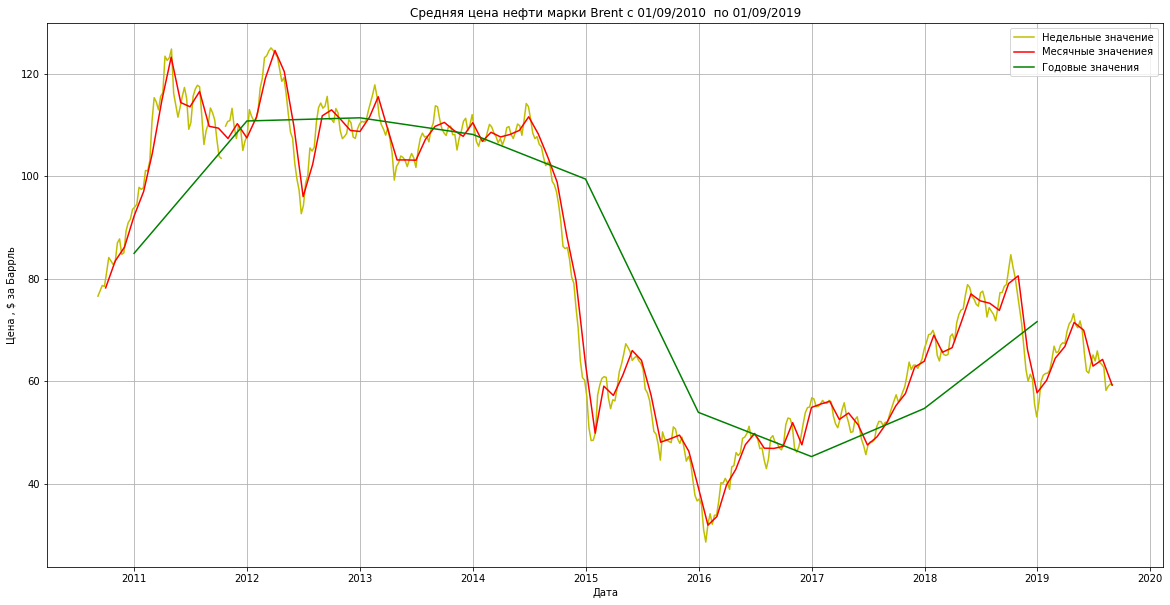

In [219]:
plt.figure(figsize=(20,10))
plt.plot(df_mean_week.index, df_mean_week['mean'].values, 'y', label='Недельные значение')
plt.plot(df_mean_month.index, df_mean_month['mean'].values, 'r', label='Месячные значениея')
plt.plot(df_mean_year.index, df_mean_year['mean'].values, 'g', label='Годовые значения')
plt.legend()
plt.xlabel('Дата')
plt.ylabel('Цена , $ за Баррль')
plt.title('Средняя цена нефти марки Brent с 01/09/2010  по 01/09/2019')
plt.grid()

plt.show()

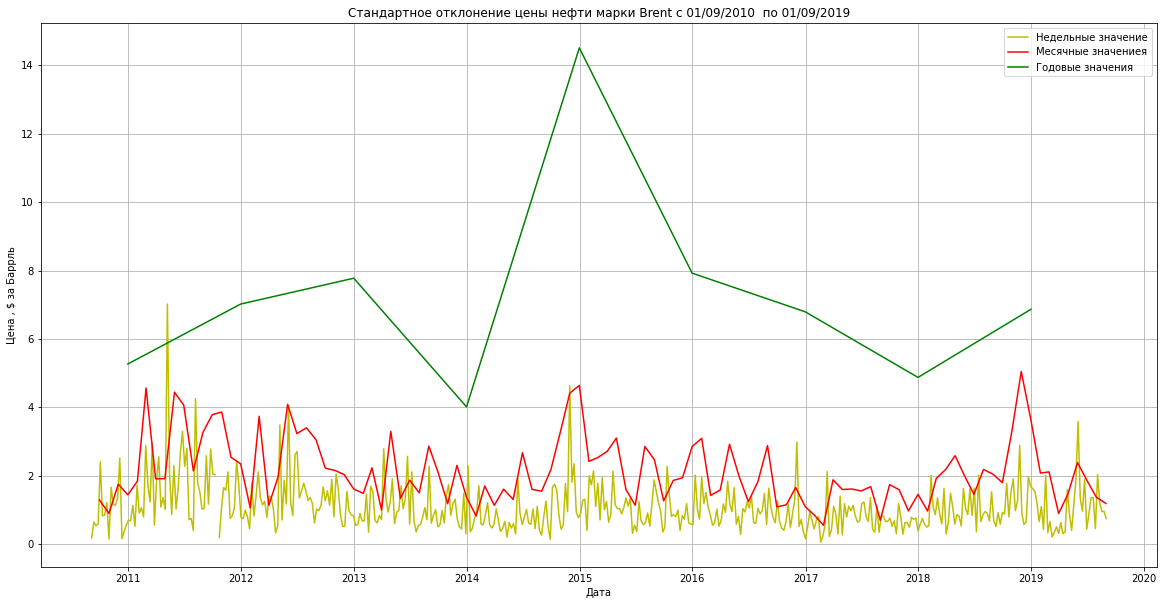

In [220]:
plt.figure(figsize=(20,10))
plt.plot(df_mean_week.index, df_mean_week['std'].values, 'y', label='Недельные значение')
plt.plot(df_mean_month.index, df_mean_month['std'].values, 'r', label='Месячные значениея')
plt.plot(df_mean_year.index, df_mean_year['std'].values, 'g', label='Годовые значения')
plt.legend()
plt.xlabel('Дата')
plt.ylabel('Цена , $ за Баррль')
plt.title('Стандартное отклонение цены нефти марки Brent с 01/09/2010  по 01/09/2019')
plt.grid()

plt.show()

5. Сделайте вывод о том, как изменилось поведение цены на недельных и месячных графиках по сравнению с дневными.

С увеличение м периода цена становится более сглаженной, краткосрочные провалы и подъемы оказывают наименьшее влияние. Но на больших периодах стандартное отклонение становится больше, т.к. среднее значение вычисляется на более длинном промежутке времени.